* **Name: Magnus Aghe** 
* **Student ID: 900400010** 
* **Email: m.aghe0010@student.nu.edu** 
* **Course: ANA680 - MODULE 2 - STUDENTS PERFORMANCE - MIDTERM 2**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
# Loading the dataset

df=pd.read_csv("StudentsPerformance.csv", na_values=['NULL', '?', 'NONE'])

**Exploring and Cleaning the Dataset**

In [4]:
df.shape

(1000, 8)

The dataset has 699 rows and 11 columns

In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [7]:
# Listing the column names

df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df = df.rename (columns = {'math score' : 'math_score', 'reading score' : 'reading_score', 'writing score' : 'writing_score'})

In [9]:
# Listing categorical features

df.select_dtypes(include=['object']).columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
# Converting 'class' to categorical and 'ID' as object

df['race/ethnicity'] = df['race/ethnicity'].astype('category')

In [12]:
# Number of values in the "class" categorical feature

df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

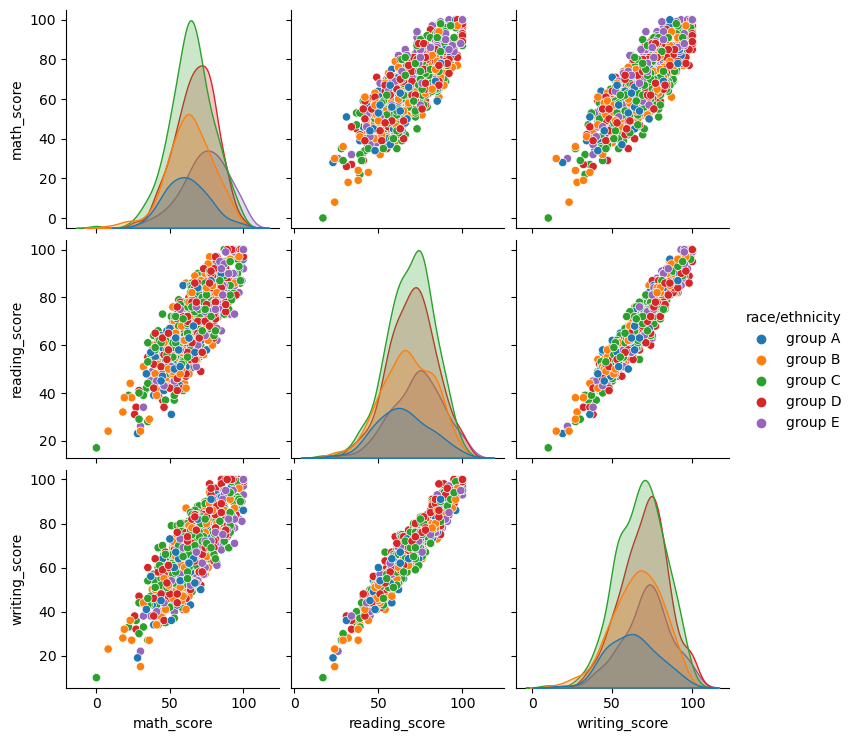

In [14]:
sns.pairplot (vars = ['math_score', 'reading_score', 'writing_score'], data = df, hue = 'race/ethnicity')
plt.show()

In [15]:
# Summing up the count size of 'race/ethnicity'

df['race/ethnicity'].value_counts().sum()

1000

In [16]:
# Let's map the class categorical values to its numbers 
# df['race/ethnicity'] = df['race/ethnicity'].map({'Group A':1, 'Group B':2, 'Group C':3, 'Group D':4, 'Group E':5})
# df

**Building the Classification Models**

In [17]:
# Selecting predictor and target variables

X = df[['math_score', 'reading_score', 'writing_score']]
Y = df['race/ethnicity']

In [18]:
# Splitting the dataset such that the test data size is 25% of the total dataset

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

**Model 1 - Logistic Regression**

In [19]:
# Training the model and predicting on test data

logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Logistic Regression
Accuracy: 0.316
Confusion Matrix:
[[ 0  0 17  6  4]
 [ 0  0 34  6  2]
 [ 0  0 51 18  7]
 [ 0  0 44 24  4]
 [ 0  0 18 11  4]]

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.00      0.00      0.00        42
     group C       0.31      0.67      0.42        76
     group D       0.37      0.33      0.35        72
     group E       0.19      0.12      0.15        33

    accuracy                           0.32       250
   macro avg       0.17      0.23      0.18       250
weighted avg       0.23      0.32      0.25       250



**Model 2 - k Nearest Neighbor (k-NN)**

In [20]:
# Training the model and predicting on test data

knn5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn5.fit(X_train, y_train.ravel())
y_pred = knn5.predict(X_test)

print("k Nearest Neighbor")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

k Nearest Neighbor
Accuracy: 0.244
Confusion Matrix:
[[ 2  6 14  4  1]
 [ 2  8 19 10  3]
 [ 9 15 30 19  3]
 [ 5 17 30 16  4]
 [ 1  8  8 11  5]]

              precision    recall  f1-score   support

     group A       0.11      0.07      0.09        27
     group B       0.15      0.19      0.17        42
     group C       0.30      0.39      0.34        76
     group D       0.27      0.22      0.24        72
     group E       0.31      0.15      0.20        33

    accuracy                           0.24       250
   macro avg       0.23      0.21      0.21       250
weighted avg       0.24      0.24      0.24       250



**Model 3 - Linear SVM**

In [21]:
# Training the model and predicting on test data

lsvm = SVC(kernel = 'linear', random_state = 0)  
lsvm.fit(X_train, y_train.ravel())
y_pred = lsvm.predict(X_test)

print("Linear SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Linear SVM
Accuracy: 0.304
Confusion Matrix:
[[ 0  0 27  0  0]
 [ 0  0 42  0  0]
 [ 0  0 76  0  0]
 [ 0  0 72  0  0]
 [ 0  0 33  0  0]]

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.00      0.00      0.00        42
     group C       0.30      1.00      0.47        76
     group D       0.00      0.00      0.00        72
     group E       0.00      0.00      0.00        33

    accuracy                           0.30       250
   macro avg       0.06      0.20      0.09       250
weighted avg       0.09      0.30      0.14       250



**Model 4 - Kernel SVM**

In [22]:
# Training the model and predicting on test data

rsvm = SVC(kernel = 'rbf', random_state = 0)  
rsvm.fit(X_train, y_train.ravel())
y_pred = rsvm.predict(X_test)

print("Kernel SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Kernel SVM
Accuracy: 0.34
Confusion Matrix:
[[ 0  0 24  3  0]
 [ 0  0 38  4  0]
 [ 0  0 68  6  2]
 [ 0  0 61 10  1]
 [ 0  0 25  1  7]]

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.00      0.00      0.00        42
     group C       0.31      0.89      0.47        76
     group D       0.42      0.14      0.21        72
     group E       0.70      0.21      0.33        33

    accuracy                           0.34       250
   macro avg       0.29      0.25      0.20       250
weighted avg       0.31      0.34      0.24       250



**Model 5 - Naive Bayes**

In [23]:
# Training the model and predicting on test data

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Naive Bayes
Accuracy: 0.352
Confusion Matrix:
 [[ 0  5 16  6  0]
 [ 0  2 25 14  1]
 [ 0  5 44 18  9]
 [ 0  3 33 31  5]
 [ 0  1  6 15 11]]
              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.12      0.05      0.07        42
     group C       0.35      0.58      0.44        76
     group D       0.37      0.43      0.40        72
     group E       0.42      0.33      0.37        33

    accuracy                           0.35       250
   macro avg       0.25      0.28      0.26       250
weighted avg       0.29      0.35      0.31       250



**Model 6 - Decision Tree**

In [24]:
# Training the model and predicting on test data

dtree = DecisionTreeClassifier(criterion='gini',random_state=0) 
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Decision Tree
Accuracy: 0.232
Confusion Matrix:
[[ 2  5  7  7  6]
 [ 6  8 15  9  4]
 [12 12 20 22 10]
 [ 7 15 19 22  9]
 [ 1  7  7 12  6]]

              precision    recall  f1-score   support

     group A       0.07      0.07      0.07        27
     group B       0.17      0.19      0.18        42
     group C       0.29      0.26      0.28        76
     group D       0.31      0.31      0.31        72
     group E       0.17      0.18      0.18        33

    accuracy                           0.23       250
   macro avg       0.20      0.20      0.20       250
weighted avg       0.24      0.23      0.23       250



**Model 7 - Random Forest**

In [25]:
# Training the model and predicting on test data

rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=10)
rfc.fit(X_train,y_train.ravel())
y_pred=rfc.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['group A','group B','group C','group D','group E']))

Random Forest
Accuracy: 0.272
Confusion Matrix:
[[ 1  4 13  7  2]
 [ 2  4 21 11  4]
 [ 1  9 39 25  2]
 [ 0  8 43 18  3]
 [ 1  5 10 11  6]]

              precision    recall  f1-score   support

     group A       0.20      0.04      0.06        27
     group B       0.13      0.10      0.11        42
     group C       0.31      0.51      0.39        76
     group D       0.25      0.25      0.25        72
     group E       0.35      0.18      0.24        33

    accuracy                           0.27       250
   macro avg       0.25      0.22      0.21       250
weighted avg       0.26      0.27      0.25       250



**Model 8 - XGBoost**

In [26]:
from sklearn.preprocessing import LabelEncoder

# Converting target labels
le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.transform(y_test)

# Training the model and predicting on test data

xg = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg.fit(X_train, encoded_y_train)
y_pred = xg.predict(X_test)

# Reversing the labels back to 2 and 4
y_pred_original_labels = le.inverse_transform(y_pred)

print("XGBoost")
print(f"Accuracy: {accuracy_score(encoded_y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(encoded_y_test, y_pred)}\n")
print(classification_report(y_test, y_pred_original_labels, target_names=['group A','group B','group C','group D','group E']))

XGBoost
Accuracy: 0.264
Confusion Matrix:
[[ 0  4 12  7  4]
 [ 3  7 19  9  4]
 [ 8  8 29 22  9]
 [ 2 17 23 24  6]
 [ 1  8 11  7  6]]

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.16      0.17      0.16        42
     group C       0.31      0.38      0.34        76
     group D       0.35      0.33      0.34        72
     group E       0.21      0.18      0.19        33

    accuracy                           0.26       250
   macro avg       0.20      0.21      0.21       250
weighted avg       0.25      0.26      0.25       250



**From the above we see that Naive Bayes had the best accuracy of 0.352 (35.2%) out of the eight models. Therefore we shall be building our model with Naive Bayes.**

In [27]:
import pickle
# Open a file and use dump() 
with open('file_StudentPerformance.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(nb, file)